we first see an imagenet model performance on flowers dataset, then use image augmentation and adding custom layers and retraining model's top 50 layers for an accuracy increase.

get imports, flowers dataset and set up the working directory, and simple dataset without augmentation.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file(origin=dataset_url,
                                 extract=True,cache_dir='./',
                                 cache_subdir='datasets')
data_dir=data_dir.replace('flower_photos.tgz','flower_photos.tgz/flower_photos')
print(data_dir)


batch_size=32
img_size=(299,299)

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
)

train_dataset=train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training'
)

validation_dataset=train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation'
)

./datasets/flower_photos.tgz/flower_photos
Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


InceptionV3 with freezed layers , with a pooling, dropout, and softmax layer

In [ ]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(299,299,3))
for layer in base_model.layers:
  layer.trainable=False

model=models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,065,701 (84.17 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

training this model on dataset

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
92/92 - 58s - 633ms/step - accuracy: 0.7397 - loss: 0.7046 - val_accuracy: 0.8536 - val_loss: 0.4276
Epoch 2/10
92/92 - 16s - 175ms/step - accuracy: 0.8445 - loss: 0.4160 - val_accuracy: 0.8741 - val_loss: 0.3662
Epoch 3/10
92/92 - 17s - 181ms/step - accuracy: 0.8792 - loss: 0.3417 - val_accuracy: 0.8659 - val_loss: 0.3596
Epoch 4/10
92/92 - 16s - 178ms/step - accuracy: 0.8942 - loss: 0.2983 - val_accuracy: 0.8755 - val_loss: 0.3258
Epoch 5/10
92/92 - 16s - 178ms/step - accuracy: 0.9017 - loss: 0.2695 - val_accuracy: 0.8741 - val_loss: 0.3325
Epoch 6/10
92/92 - 17s - 185ms/step - accuracy: 0.9126 - loss: 0.2420 - val_accuracy: 0.8865 - val_loss: 0.3081
Epoch 7/10
92/92 - 16s - 178ms/step - accuracy: 0.9187 - loss: 0.2199 - val_accuracy: 0.8700 - val_loss: 0.3508
Epoch 8/10
92/92 - 17s - 181ms/step - accuracy: 0.9262 - loss: 0.2015 - val_accuracy: 0.8865 - val_loss: 0.2997
Epoch 9/10
92/92 - 17s - 187ms/step - accuracy: 0.9374 - loss: 0.1793 - val_accuracy: 0.8851 - val_loss:

graphical performance representation

Validation Accuracy: 0.8769


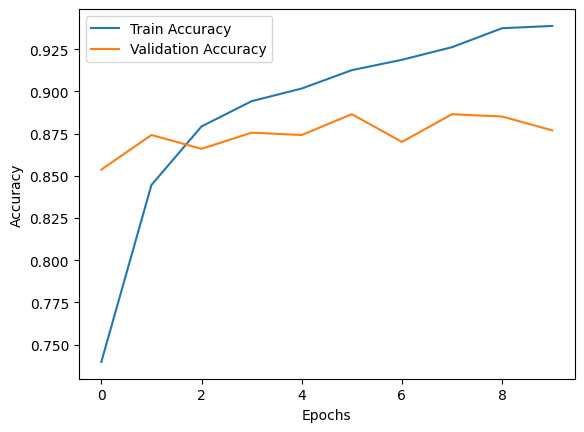

In [ ]:
loss,accuracy=model.evaluate(validation_dataset,verbose=0)
print(f"Validation Accuracy: {accuracy:.4f}")
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

data augmentation on training dataset. Can also do on validation data.

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_dataset=train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training'
)

'''validation_dataset=train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation'
)'''

Found 2939 images belonging to 5 classes.


"validation_dataset=train_datagen.flow_from_directory(\n    data_dir,\n    target_size=img_size,\n    batch_size=batch_size,\n    subset='validation'\n)"

training the model on the augmented dataset

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5,
    verbose=2
)

Epoch 1/5
92/92 - 82s - 888ms/step - accuracy: 0.9180 - loss: 0.2343 - val_accuracy: 0.8741 - val_loss: 0.3642
Epoch 2/5
92/92 - 80s - 874ms/step - accuracy: 0.9037 - loss: 0.2478 - val_accuracy: 0.8741 - val_loss: 0.3533
Epoch 3/5
92/92 - 81s - 879ms/step - accuracy: 0.9177 - loss: 0.2217 - val_accuracy: 0.8796 - val_loss: 0.3685
Epoch 4/5
92/92 - 80s - 869ms/step - accuracy: 0.9190 - loss: 0.2251 - val_accuracy: 0.8810 - val_loss: 0.3584
Epoch 5/5
92/92 - 79s - 858ms/step - accuracy: 0.9170 - loss: 0.2216 - val_accuracy: 0.8769 - val_loss: 0.3305


not much increase in validation accuracy by augmentation itself, indicating a possibly clean and good sized dataset

Validation Accuracy: 0.8673


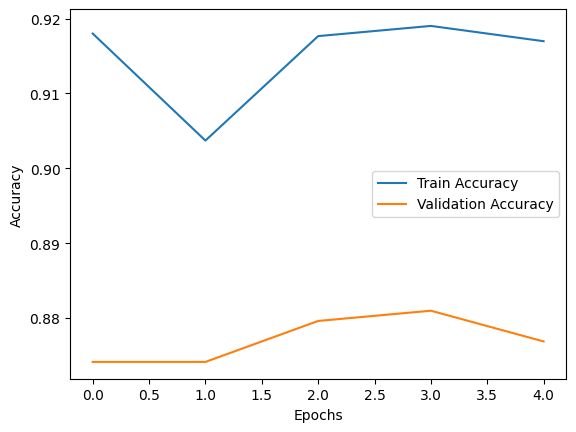

In [ ]:
loss,accuracy=model.evaluate(validation_dataset,verbose=0)
print(f"Validation Accuracy: {accuracy:.4f}")
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

now we unfreeze top 50 InceptionV3 layers to fine tune them.

In [ ]:
for layer in base_model.layers[-50:]:
  layer.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_dataset,validation_data=validation_dataset,epochs=5,verbose=2)
loss,accuracy=model.evaluate(validation_dataset,verbose=0)


Epoch 1/5
92/92 - 123s - 1s/step - accuracy: 0.8884 - loss: 0.3150 - val_accuracy: 0.8728 - val_loss: 0.4011
Epoch 2/5
92/92 - 82s - 893ms/step - accuracy: 0.9289 - loss: 0.2080 - val_accuracy: 0.8933 - val_loss: 0.3328
Epoch 3/5
92/92 - 80s - 874ms/step - accuracy: 0.9486 - loss: 0.1495 - val_accuracy: 0.9001 - val_loss: 0.3638
Epoch 4/5
92/92 - 80s - 871ms/step - accuracy: 0.9653 - loss: 0.1080 - val_accuracy: 0.9029 - val_loss: 0.4529
Epoch 5/5
92/92 - 79s - 856ms/step - accuracy: 0.9622 - loss: 0.1071 - val_accuracy: 0.8974 - val_loss: 0.4001


the accuracy increase now is 3-5%

Validation Accuracy: 0.8988


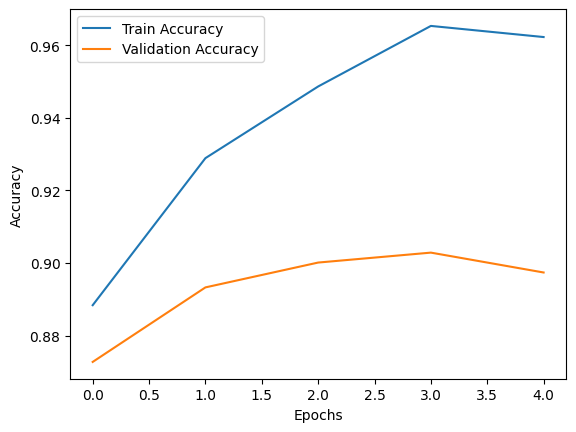

In [ ]:
loss,accuracy=model.evaluate(validation_dataset,verbose=0)
print(f"Validation Accuracy: {accuracy:.4f}")
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()